# Problem Statement



Imagine a binary rooted tree with a positive weight on each node. We want
to choose a subset of the nodes so that the total sum of the weights is
maximized with the constraint that no two adjacent nodes can be chosen.
For instance, in the following tree, the set of nodes with weights (41, 13, 42, 32, 31)
is optimal. Note that no two nodes are adjacent.

- Hint 0: Solve this recursively. Then add-on memoization.
- Hint 1: How can we solve this recursively? One important observation
is that in any rooted binary tree, the optimal list of nodes that doesn’t
include the root node will be the union of optimal lists for the left and
right subtrees. And the optimal list that does include the root node
will be the union of optimal lists for the left and right subtrees that do
not include their respective root nodes.

## General Idea

Either we add the current node or not

In the case of adding the current node, find the max of the tree below with out the children included
In the case of not addding the current node, find the max of the tree with the children included.

which ever is greater is the subtree we go with. 

## Code 

In [1]:
class TreeNode:
    def __init__(self, weight=0, left=None, right=None):
        self.weight = weight
        self.left = left
        self.right = right

# Function to add a new node to the tree
def add_node(root, weight):
    if root is None:
        return TreeNode(weight)
    
    if weight < root.weight:
        if root.left is None:
            root.left = TreeNode(weight)
        else:
            add_node(root.left, weight)
    else:
        if root.right is None:
            root.right = TreeNode(weight)
        else:
            add_node(root.right, weight)
    
    return root

In [2]:
def mibt(root):
    memo = {}

    def helper(node):
        if node is None:
            return (0, [])
        if node in memo:
            return memo[node]

        
        # Case 1: Include the current node
        include_node_sum = node.weight
        include_node_set = [node.weight]  # Start with the current node in the subset

        if node.left:
            left_sum, left_nodes = helper(node.left.left)
            right_sum, right_nodes = helper(node.left.right)
            include_node_sum += left_sum + right_sum
            include_node_set.extend(left_nodes + right_nodes)

        if node.right:
            left_sum, left_nodes = helper(node.right.left)
            right_sum, right_nodes = helper(node.right.right)
            include_node_sum += left_sum + right_sum
            include_node_set.extend(left_nodes + right_nodes)

        
        # Case 2: Exclude the current node
        exclude_node_sum = 0
        exclude_node_set = []
        if node.left:
            left_sum, left_nodes = helper(node.left)
            exclude_node_sum += left_sum
            exclude_node_set.extend(left_nodes)

        if node.right:
            right_sum, right_nodes = helper(node.right)
            exclude_node_sum += right_sum
            exclude_node_set.extend(right_nodes)

        
        # Take the maximum of both cases and record the selected subset of nodes
        if include_node_sum > exclude_node_sum:
            result = (include_node_sum, include_node_set)
        else:
            result = (exclude_node_sum, exclude_node_set)

        # Store the result in memo to avoid redundant calculations
        memo[node] = result
        return result

    max_sum, nodes_subset = helper(root)
    return max_sum, nodes_subset

## Tests

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_tree(root):
    # Initialize a NetworkX graph object
    graph = nx.DiGraph()

    # Define a recursive helper function to add nodes and edges to the graph
    def add_edges(node, parent=None, pos={}, level=0, x=0):
        if node is None:
            return pos
        
        # Set the position for the current node
        pos[node] = (x, -level)
        
        # If there is a parent, add an edge from the parent to the current node
        if parent is not None:
            graph.add_edge(parent, node)
        
        # Recurse for the left and right children
        if node.left:
            pos = add_edges(node.left, node, pos, level + 1, x - 1 / (2**level))
        if node.right:
            pos = add_edges(node.right, node, pos, level + 1, x + 1 / (2**level))
        
        return pos

    # Get positions of nodes and add edges recursively
    pos = add_edges(root)

    # Draw the graph
    plt.figure(figsize=(8, 6))
    nx.draw(graph, pos, with_labels=True, labels={node: node.weight for node in pos}, 
            node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', 
            font_color="black", arrows=False)
    plt.show()

(18, [18])
(1, [1])


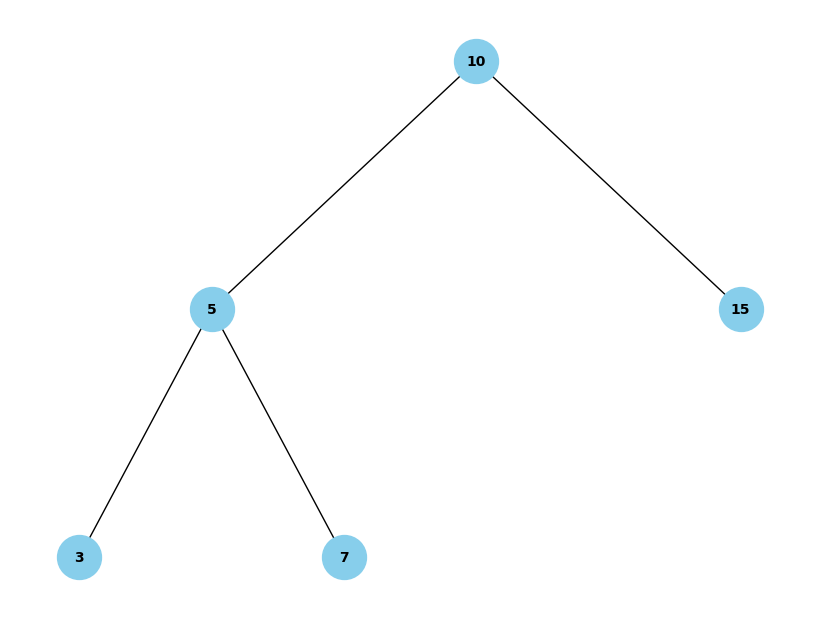

(25, [3, 7, 15])


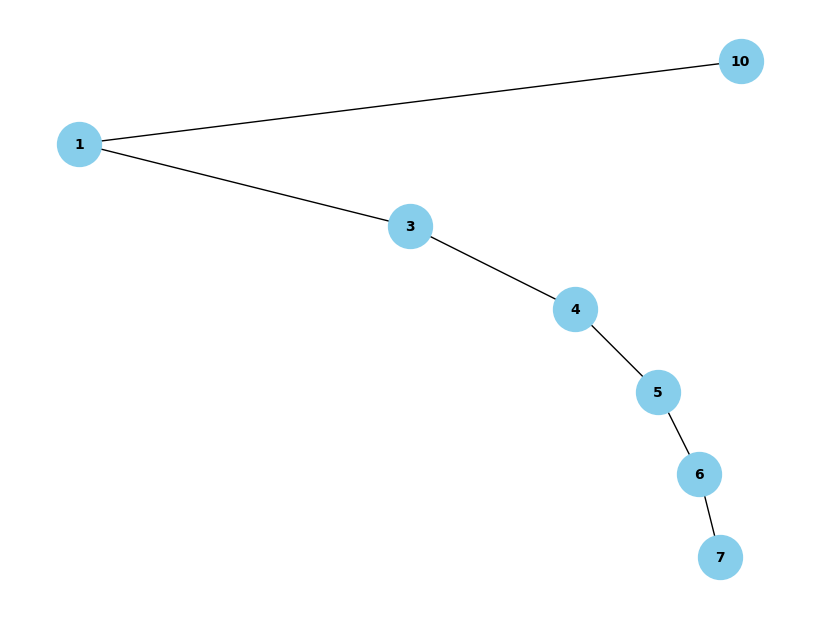

(25, [10, 3, 5, 7])


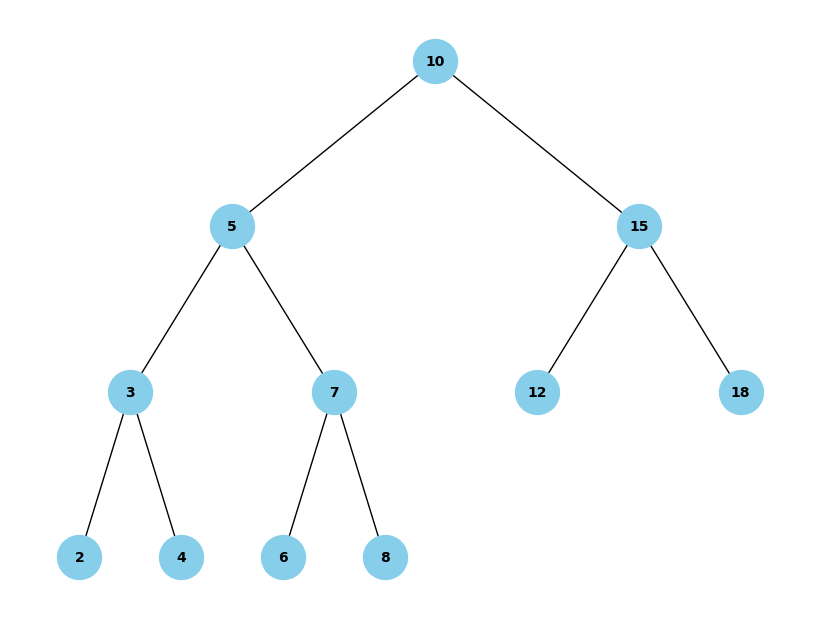

(60, [10, 2, 4, 6, 8, 12, 18])


In [4]:
root4 = TreeNode(5)
add_node(root4, 18)
print(mibt(root4))

root5 = TreeNode(1)
print(mibt(root5))

root = TreeNode(10)
add_node(root, 5)
add_node(root, 15)
add_node(root, 3)
add_node(root, 7)
plot_tree(root)
print(mibt(root))

root2 = TreeNode(10)
root2 = add_node(root2, 1)
root2 = add_node(root2, 3)
root2 = add_node(root2, 4)
root2 = add_node(root2, 5)
root2 = add_node(root2, 6)
root2 = add_node(root2, 7)
plot_tree(root2)
print(mibt(root2))

root3 = TreeNode(10)
add_node(root3, 5)
add_node(root3, 15)
add_node(root3, 3)
add_node(root3, 7)
add_node(root3, 2)
add_node(root3, 4)
add_node(root3, 6)
add_node(root3, 8)
add_node(root3, 12)
add_node(root3, 18)
plot_tree(root3)
print(mibt(root3))



## Proof of Correctness

## Runtime